# Stocks Prediction

**Description:** This program uses an artificial recurrent neural network also called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Get the data

In [2]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-10-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540046
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607439
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747406
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880666
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860233
...,...,...,...,...,...,...
2022-09-26,153.770004,149.639999,149.660004,150.770004,93339400.0,150.770004
2022-09-27,154.720001,149.949997,152.740005,151.759995,84442700.0,151.759995
2022-09-28,150.639999,144.839996,147.639999,149.839996,146691400.0,149.839996


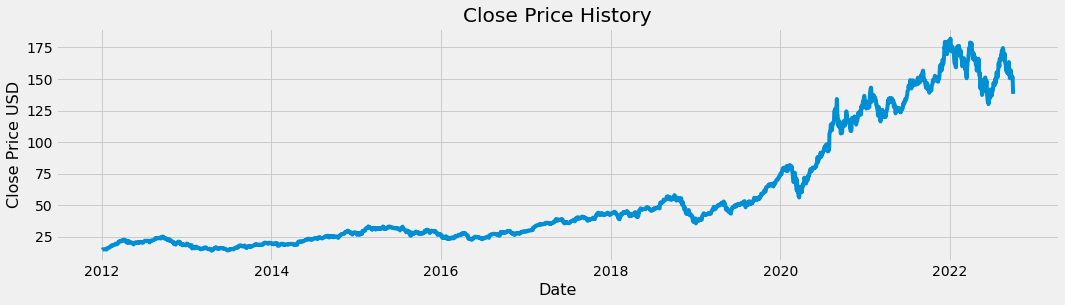

In [3]:
plt.figure(figsize=(16, 4))
plt.plot(df['Close'])
plt.title("Close Price History")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close Price USD", fontsize=16)
plt.show()

In [4]:
data = df.filter(['Close']).values

In [5]:
training_data_len = int(len(data) * 0.8)
training_data_len

2164

# Scale Data

In [6]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create Train and Test Sets

In [7]:
WINDOW = 60

# Train set
X_train = []
y_train = []
train_data = scaled_data[0:training_data_len]
for i in range(len(train_data) - WINDOW):
    X_train.append(train_data[i : i + WINDOW])
    y_train.append(train_data[i + WINDOW])
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)

# Test set
X_test = []
y_test = []
test_data = scaled_data[training_data_len - WINDOW :]
for i in range(len(test_data) - WINDOW):
    X_test.append(test_data[i : i + WINDOW])
    y_test.append(test_data[i + WINDOW])
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1, 1)

# Build LSTM Model

In [8]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

2022-10-01 19:09:37.431434: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

2022-10-01 19:09:38.028716: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2104/2104 [==============================] - 50s 22ms/step - loss: 4.3507e-04


In [10]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [11]:
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
rmse

5.8783583060277245

# Plot the data

In [12]:
past = df.iloc[:training_data_len]
future = df.iloc[training_data_len:]
future['Predictions'] = y_pred

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


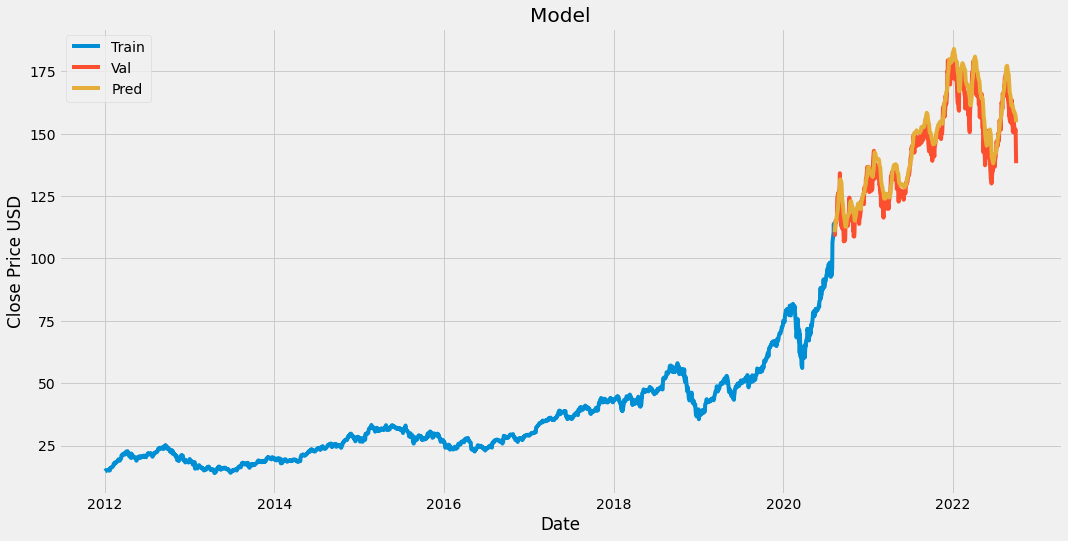

In [13]:
plt.figure(figsize=(16, 8))

plt.plot(past['Close'], label='Train')
plt.plot(future['Close'], label='Val')
plt.plot(future['Predictions'], label='Pred')
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()

plt.show()